In [1]:
# стиль оформления документа
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("file:Img/lecture.css")
HTML(html.read().decode('utf-8'))

<img src=
ФинУ.jpg>

<p style="font-size:150%; text-align:left">Алгоритмы и структуры данных в языке Python</p>

Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации
<p style="font-size:150%; text-align:left">Тема 5. Работа с файлами и обработка исключительных ситуаций</p>
<p style="font-size:150%; text-align:left">Семинар 5.1 (12) Обработка исключительных ситуаций</p>

При подготовке занятия использованы материалы онлайн школы <a href=https://skillfactory.ru/> SkillFactory </a>

<p class="tab_text large_text green">Учебные вопросы</p>

- ошибки и исключения в программе;
- отладка программы;
- тестирование программы.

<p class="tab_text large_text green">Задачи</p>

- научиться обрабатывать ошибки;
- эффективно устранять ошибки;
- повысить устойчивость кода к ошибкам.

<p class="large_text" style="text-align:center">1. Сообщения об ошибках</p>

Программа — набор инструкций, которые мы отправляем интерпретатору. Когда интерпретатор не понимает наших инструкций, он сообщает об этом. Возникает сообщение об ошибке.

Мы допустили синтаксическую ошибку и получили сообщение:

```
print("Привет!')
    File "<ipython-input-4-ebeda6125e45>", line 1
        print("hello')
                  ^
SyntaxError: EOL while scanning string literal
```

Обратите внимание:

- Сообщение начинается с названия файла, где допущена ошибка. В примере это ячейка из Jupyter, поэтому название является техническим.
- После названия файла идёт номер строки с ошибкой, в данном случае — первая строка (line 1).
- Выводится конкретная строка из кода.
- В конце указывается, что это была синтаксическая ошибка (SyntaxError), и идёт пояснительное сообщение. У разных синтаксических ошибок пояснительное сообщение разное и обычно позволяет понять, как исправить ошибку.

Сообщение об ошибке удобно читать с конца.

<p class="header_4">Задание</p>

Какой номер у строки с ошибкой, судя по этому сообщению?

```
File "<ipython-input-273-806349a3f7cd>", line 6
    def street(street_name, last_house)
                                       ^
SyntaxError: invalid syntax
```

In [1]:
# Ваш ответ здесь

print('Номер строки с ошибкой: 6')

Номер строки с ошибкой: 6


<p class="header_2" style="text-align:center"> Исключения </p>

**Синтаксические ошибки** исправлять проще всего: это опечатки, и даже если мы их допустили, часто они находятся в одной строчке, на которую нам указывает интерпретатор. Более интересный класс ошибок — неудачные сочетания логики и данных:

```
a=5/0
----------------------------------------------------------------------
ZeroDivisionError                    Traceback (most recent call last)
<ipython-input-5-7ab028d636d0> in <module>
----> 1 a=5/0

ZeroDivisionError: division by zero
```
Мы стали делить на ноль, и Python вывел сообщение об ошибке:

- название исключения (ZeroDivisionError);
- файл, номер строки и сама строка с ошибкой;
- название исключения повторяется и добавляется поясняющее сообщение division by zero.

Если ошибка будет в другом, название исключения и поясняющее сообщение изменится:

```
university = {"univ_name": "Finance", "city": "Moscow"}  
university["rating"]
---------------------------------------------------------------------
KeyError                             Traceback (most recent call last)
<ipython-input-6-22d4e579e046> in <module>
      1 university = {"univ_name": "Finance", "city": "Moscow"}
----> 2 university["rating"]

KeyError: 'rating'
```
В этом примере мы получили *KeyError* — отсутствующий ключ в словаре и сам ключ.

<p class="header_4">Задание</p>

Назовите имя исключения по сообщению об ошибке:

```
-------------------------------------------------------------------
FileNotFoundError                 Traceback (most recent call last)
ipython-input-275-905b846ab02e in module
      4     csv_file = open("random.csv")
      5 
----> 6 open_imdb()
      7 

ipython-input-275-905b846ab02e in open_imdb()
      2 
      3 def open_imdb():
----> 4     csv_file = open("random.csv")
      5 
      6 open_imdb()

FileNotFoundError: [Errno 2] No such file or directory: 'random.csv'
```

In [3]:
# Ваш ответ здесь
print('Имя ошибки: FileNotFoundError \nПояснительная записка: [Errno 2] No such file or directory: "random.csv" \nНомер строки: 4')

Имя ошибки: FileNotFoundError 
Пояснительная записка: [Errno 2] No such file or directory: "random.csv" 
Номер строки: 4


<p class="header_2" style="text-align:center"> Стэк вызова </p>

В сообщении об ошибке указывается файл и номер строки, где она случилась. На самом деле, указывается стэк вызова (Traceback). Это путь, который проходит интерпретатор до того, как встретил ошибку. 

Пример: фрагмент программы генерирует таблички для шкафов определенного раздела литературы в библиотеке университета. Параметрами программы являются раздел литературы *partition* и последний номер шкафа *last_bookcase.*

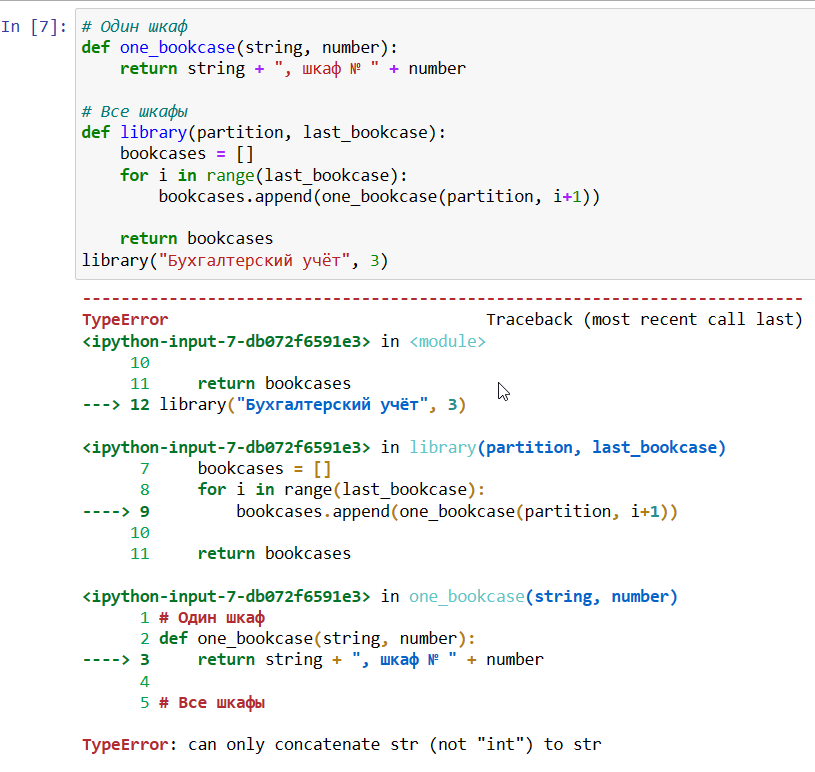

Мы вызвали функцию *library()*, которая воспользовалась *one_bookcase()*, где уже закралась ошибка. В сообщении об ошибке видим список всех наших функций с их местоположением и кодом, приведённый в том порядке, как мы их вызывали:

- вызов library() на 12-й строчке;
- вызов one_bookcase() внутри library на 9-й;
- ошибка на 3-й строчке;
- интерпретатор получил число там, где ожидал строку.

Мы пытаемся сложить строку *string* с числом *number*. Достаточно поменять это сложение на форматированную строку, чтобы программа корректно заработала.

In [2]:
# Один шкаф
def one_bookcase(string, number):
    return f"{string}, шкаф № {number}"
  
# Все шкафы
def library(partition, last_bookcase):
    bookcases = []
    for i in range(last_bookcase):
        bookcases.append(one_bookcase(partition, i+1))
        
    return bookcases

library("Бухгалтерский учёт", 3)

['Бухгалтерский учёт, шкаф № 1',
 'Бухгалтерский учёт, шкаф № 2',
 'Бухгалтерский учёт, шкаф № 3']

<p class="header_4">Задание</p>

Приведён стэк вызова из сообщения об ошибке. Назовите имя функции, внутри которой произошла ошибка:
```
--------------------------------------------------------------------
IndexError                         Traceback (most recent call last)
ipython-input-1-70bd89baa4df in module()
      6     print(ice_creams[3])
      7
----> 8 favorite_ice_cream()

ipython-input-1-70bd89baa4df in favorite_ice_cream()
      4         "vanilla", "strawberry"
      5     ]
----> 6     print(ice_creams[3])
      7
      8 favorite_ice_cream()

IndexError: list index out of range
```

In [4]:
# ваш ответ здесь
print('Имя функции: favorite_ice_cream')

Имя функции: favorite_ice_cream


<p class="header_2" style="text-align:center"> Зачем такой стэк </p>

Зачем нам предыдущие шаги в стэке вызова, если в конце показывается истинное место ошибки. Причины две:

1. Одна и та же функция может вызваться в разных местах с разными данными: полный путь помогает понять контекст.
2. Вы пользуетесь сторонней библиотекой и некорректно применили функцию из неё, тогда ошибка может уйти глубже и в конце стэка будут показываться нерелеватные внутренности библиотеки, а нужная функция будет в середине стэка.

<p class="header_2" style="text-align:center"> Что такое исключение </p>

Исключения — это ещё один тип данных, как строки или числа.

In [5]:
print(type("University"))  
print(type(42))
print(type(["a","b","c"]))

print(type(SyntaxError()))
print(type(FileNotFoundError()))
print(type(ZeroDivisionError()))
print(type(NameError()))

<class 'str'>
<class 'int'>
<class 'list'>
<class 'SyntaxError'>
<class 'FileNotFoundError'>
<class 'ZeroDivisionError'>
<class 'NameError'>


Список часто встречающихся встроенных ошибок Python можно посмотреть здесь: https://www.tutorialsteacher.com/python/error-types-in-python

Когда программа встречает некорректные ситуации, она выбрасывает исключения. Это делает сам интерпретатор, но могут делать и авторы библиотек и программ в определённых ситуациях. Для этого есть специальный синтаксис `raise Exception()`

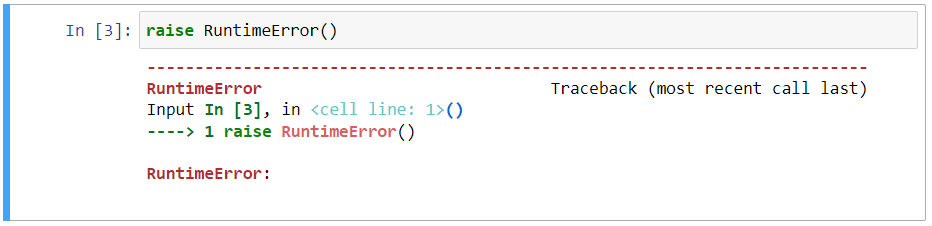

Зачем специально генерировать ошибку в собственном коде? Для того, чтобы писать более предсказуемый код. Во многих ситуациях выбросить ошибку лучше, чем работать с некорректными данными. Выбрасывание исключений является повсеместной практикой в Python и других языках программирования.

Пример: вот функция, которая отбирает деревья по определенному признаку:

In [5]:
def tree_type(tree_name):
    if tree_name == "birch": # берёза
        print("a tree with leaves") # листья
    elif tree_name == "pine": # сосна
        print("a tree with needles") # иголки

tree_type("birch")

a tree with leaves


Что произойдёт, если мы вызовем эту функцию для платана (sycamore)?

In [6]:
tree_type("sycamore")

Ничего не произошло, название дерева отсутствует и функция ничего не вернула. Такая ситуация опасна тем, что мы думаем, что если ошибки нет, то всё в порядке. Однако в данном случае отсутстве отклика от функции может привести к принятию неверного решения в дальнейшем.

Более корректно было бы выбросить ошибку:

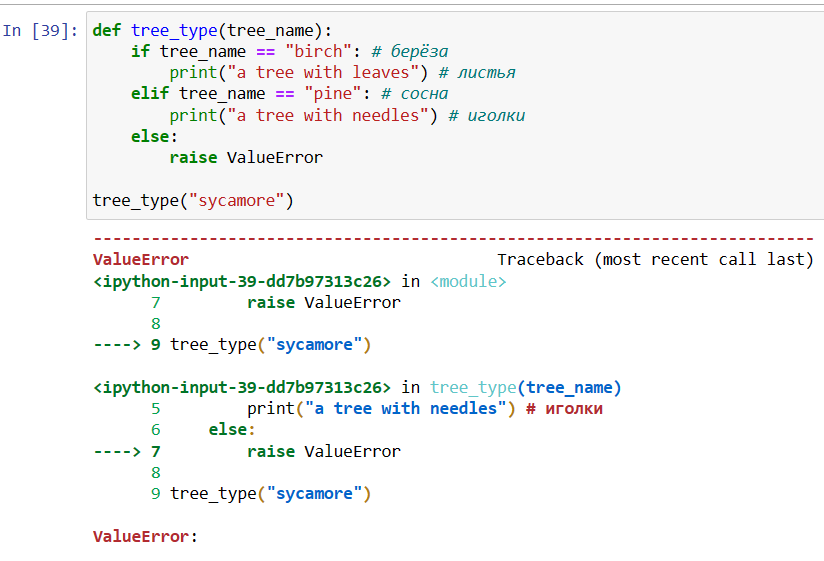

Здесь мы выбросили "Ошибку значения" (ValueError), но ошибка не информативная. Мы можем добавить поясняющее сообщение.

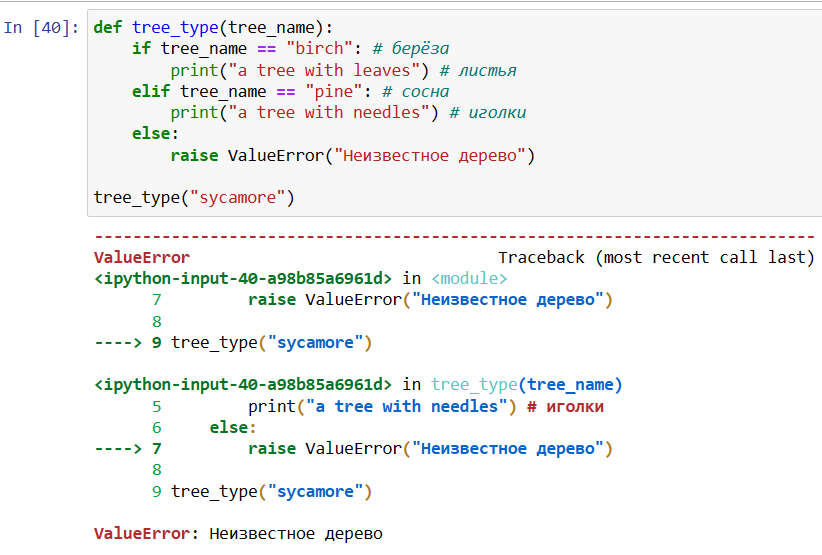

В последней строчке добавилось пояснение, что мы передали название неизвестного дерева. В Python достаточно много встроенных типов исключений. Вы можете посмотреть их в <a href=https://docs.python.org/3/library/exceptions.html>документации</a> к языку и выбрать подходящий по смыслу для вашей ситуации.

<p class="header_4"> Задание </p>

Напишите текст, который выведется на последней строке при исполнении программы
```
def preprocess_data(data, mode):
    if mode == "to_number":
        return [float(value) for value in data]
    elif mode == "to_str":
        return [str(value) for value in data]
    else:
        raise ValueError("Incorrect mode")
        
preprocess_data({"price": 100}, "to_array")
```

In [6]:
# Ваш ответ здесь
print('ValueError: Incorrect mode')

ValueError: Incorrect mode


<p class="header_4"> Задание </p>

Определите функцию *check_server()*, которая принимает на вход переменную *mode*.

- Если mode имеет значение "memory", программа должна вернуть строку "Memory is ok".
- Если mode имеет значение "connection", программа должна вернуть строку "Connection is ok".
- Для остальных случаев программа должна выбросить исключение ValueError.

In [8]:
# Ваш код здесь
def check_server(mode):
    if mode == "memory":
        return "Memory is ok"
    elif mode == "connection":
        return "Connection is ok"
    else:
        raise ValueError("Incorrect mode")
        
check_server('a')

ValueError: Incorrect mode

<p class="large_text" style="text-align:center"> 2. Обработка исключений </p>

### Что такое исключение

Мы научились выбрасывать исключения, и потенциально это ломает программу. Очевидный способ избавиться от этого — исправить ошибку, но бывают ситуации, когда мы не вполне контролируем данные, например, пользовательский ввод или большая база данных с небольшим количеством искаженных данных. Изредка мы всё-таки будем получать исключения, и нам надо с этим как-то работать.

Для этой цели мы можем воспользоваться блоком отработки исключений — *try-except*. Он позволяет отрабатывать исключения, не прерывая хода программы. Без блока *try-except* в примере мы бы получили *KeyError*, здесь же мы печатаем строку *Ой, ключ не найден* и продолжаем выполнение программы.

    dictionary = {}
    try:
        dictionary["no_key"]
    except:
        print("Oops, key not found")
      
    print("End of program")
    # => Oops, key not found
    # => End of program

Если более формально, то мы пробуем выполнить часть программы, которая находится внутри *try*. Если эта часть кода выбрасывает исключение, то мы сразу переходим к выполнению части внутри *except*. Если же исключение не выбрасывается, то мы пропускаем часть внутри *except*. В любом случае мы выполняем программу дальше, как обычно.

<p class="header_4">Задание</p>

<p class="header_6"> 2.1. Try-except 1 </p>

Что выведет этот блок try-except?
```
try:
    print("Inside try block")
except:
    print("Inside except block")
```


<p class="header_6"> 2.2. Try-except 2 </p>

Что выведет этот блок try-except?
```
try:
    4 + "b"
    print("Inside try block")
except:
    print("Inside except block")
```

In [11]:
# 2.1
print("Inside try block")

# 2.2
print("Inside except block")

Inside try block
Inside except block


<p class="large_text" style="text-align:center"> 3. Осознанная обработка исключений </p>

Общая идея использования try-except такая:

- вы знаете, что у вас может возникнуть исключение, и не можете его полностью избежать;
- вы "отлавливаете" эти исключения, а в блок *except* помещаете логику, которая позволит вам из этой ситуации корректно выйти.

Когда мы вызываем *raise*, то делаем подачу: тут какие-то не такие данные, нужно исправить. Когда мы обрабатываем исключения через *try-except*, то принимаем: да, данные неидеальные, но я об этом подумал. Проблема в том, что с обычным *try-except* можно "отловить" не только те исключения, на которые мы рассчитывали. 

Посмотрим на примере: у нас есть программа, которая отрабатывает очень большую базу данных, и мы бы хотели, чтобы была возможность корректно прервать её с клавиатуры. Код мог бы выглядеть как-то так:
```
try:  
    # запускаем программу отработки базы данных  
    process(db)   
except:  
    # если с клавиатуры пришло прерывание, то корректно останавливаем процесс  
    gently_close(db)
```
При остановке с клавиатуры мы получаем исключение *KeyInterrupt*, так что мы идём в блок *except* и корректно закрываем базу данных. Проблема в том, что *except* "отловит" и другие исключения, например, ошибку отсутствующего ключа или таймаута, что усложнит для нас обнаружение и исправление этих ошибок. На этот случай *try-except* позволяет указывать, какое именно исключение мы отлавливаем.

```
try:  
    process(db)   
except KeyInterrupt:  # обратите внимание, что мы добавили имя исключения после except  
    gently_close(db)
```

Так мы не пропустим случайно неожиданную ошибку. Давайте посмотрим на ещё один пример для закрепления синтаксиса:

```
dictionary = {}  
try:  
    dictionary["no_key"]  
except KeyError:  
    print("Oops, key not found")  
# => Oops, key not found  
  
  
dictionary = {}  
try:  
    dictionary["no_key"]  
except IOError:  
    print("Oops, key not found")  
# ---------------------------------------------------------------------------  
# KeyError                                  Traceback (most recent call last)  
# <ipython-input-90-56e08e34101d> in <module>  
#       8 dictionary = {}  
#       9 try:  
# ---> 10     dictionary["no_key"]  
#      11 except IOError:  
#      12     print("Oops, key not found")  
  
# KeyError: 'no_key
```
Во втором случае мы ожидали IOError, но исключение было KeyError, поэтому программа прервалась с ошибкой. Это упростит исправление ошибки.

Подведем итог: конкретное исключение в *try-except* нужно указывать, чтобы не пропустить случайно исключение, про которое мы не знаем и упростить исправление ошибки.

<p class="large_text" style="text-align:center"> 4. Иерархия исключений </p>

Исключения в Python имеют иерархию: имеются более общие и более специфичные исключения. Вот график исключений:

<img src="Img/exception_hierarchy.png"/>

Здесь мы видим, что KeyError и IndexError являются подмножеством LookupError, которая является подмножеством Exception. На практике это имеет следующее значение: если мы укажем исключение верхнего уровня, то "отловятся" все дочерние, но не наоборот.

Напишем функцию, которая может обращаться и к спискам, и к словарям при этом не выбрасывая исключение для несуществующих индексов/ключей   

    def safe_element(collection, place):  
        try:  
            return(collection[place])  
        except LookupError:  
            print("Key or index not found")  
      
    users = ["Pavel", "Elena", "Sergey"]  
    safe_element(users, 1)  
    # => 'Elena'  
    safe_element(users, 3)  
    # => 'Key or index not found'   

    height = {"birch": 10, "pine": 20}
    safe_element(height, "birch")
    # => 10
    safe_element(height, "sycamore")
    # => 'Key or index not found'

Желательно указывать наиболее специфичное исключение. Полную иерархию можно посмотреть в <a href="https://docs.python.org/2/library/exceptions.html#exception-hierarchy">документации</a>.

<p class="header_4">Задание</p>

<p class=header_6> 4.1. Родители ZeroDivision </p>

Назовите одно из исключений, для которого *ZeroDivisionError* является дочерним.

<p class=header_6> 4.2. safe_sum </p>

Напишите программу, которая реализует безопасное сложение двух объектов $x$ и $y$.

Если объекты не могут быть сложены, функция должна:

- Отловить TypeError
- Вывести на экран "Can't sum x and y", где x и y - переданные числа
- Вернуть 0

```
safe_sum(1, 2)
#=> 3

safe_sum(5, 'a')
# => Can't sum 5 and a
# 0
```


In [13]:
# 4.1. Ваш код здесь
raise ArithmeticError('ArithmeticError')

ArithmeticError: ArithmeticError

In [20]:
# 4.2. Ваш код здесь
def safe_sum(k1, k2):
    try:
        return k1+k2
    except:
        return f"Can't sum {k1} and {k2}"
        
print(safe_sum(12, 21))
print(safe_sum(12, 'd'))

33
Can't sum 12 and d


<p class="large_text" style="text-align:center"> 5. Детали try-except </p>

Мы рассмотрели базовый синтаксис *try-except*, однако у него есть ещё несколько вариаций. Они не часто встречаются на практике. Иногда в блоке *except* нам нужен доступ к самому объекту исключения, например, мы хотим получить поясняющее сообщение и вывести его на экран, но при этом продолжить программу дальше. Мы можем это сделать с помощью ключевого слова *'as'*, за которым идёт имя новой переменной.
```
try:  
    5/0  
except ZeroDivisionError as zero_error:  
    # здесь в zero_error мы получаем сам объект исключения  
    # print как раз выведет его поясняющее сообщение  
    print(zero_error)  
  
print("Program ends correctly")  
  
# => division by zero  
# => Program ends correctly
```

Ещё один распространённый **шаблон** — мы делаем какое-то промежуточное действие, а потом перевыбрасываем исключение.
```
# Пусть у нас есть функция, которая шлёт емейл разработчику об ошибке  
def notify_admin(error):  
    print("The administrator has been e-mailed about this", error)  
      
value = "poem"  
try:  
    digitized = int(value)  
except ValueError as digitized_error:  
    notify_admin(digitized_error)  
    raise digitized_error  
      
# => The administrator has been e-mailed about this invalid literal for int() with base 10: 'poem'  
# ---------------------------------------------------------------------------  
# ValueError                                Traceback (most recent call last)  
# <ipython-input-121-3fd4cd869d2d> in <module>  
#       8 except ValueError as digitized_error:  
#       9     notify_admin(digitized_error)  
# ---> 10     raise digitized_error  
#      11   
#      12   
  
# <ipython-input-121-3fd4cd869d2d> in <module>  
#       5 value = "poem"  
#       6 try:  
# ----> 7     digitized = int(value)  
#       8 except ValueError as digitized_error:  
#       9     notify_admin(digitized_error)  
  
# ValueError: invalid literal for int() with base 10: 'poem'
```
Обратите внимание: мы перехватили ошибку и отправили админу стандартное сообщение об ошибке, затем мы вывели на печать сообщение о том, что админ уведомлен и также о том, какое именно сообщение админу направлено, затем только мы вызвали явно эту же ошибку.

Другая полезная вещь, что для одного *try* можете писать более одного *except* на разные исключения.
```
try:  
    # открываем файл и считываем строку  
    data_file = open("valuable_data.txt")  
    s = data_file.readline()  
    # пробуем преобразовать её в число  
    i = float(s.strip())  
except OSError as err:  
    # если файла нет или его не удаётся прочитать, мы получил ошибку операционной системы   
    print("OS error: {0}".format(err))  
except ValueError:  
    # если данные не преобразуется в число, мы получим ValueError  
    print("Could not convert data to float")  
  
# => OS error: [Errno 2] No such file or directory: 'valuable_data.txt'
```
У *try-except* есть блоки *else* и *finally*, первый выполняется в случае, если мы не встретили исключение в *try*, используется в основном для чуть более чистого кода. *Finally* выполняется в любом случае, даже если возникло непредвиденное исключение или выход с помощью *return*. Обычно используется для корректного освобождения ресурсов, например, закрытия файлов.

<p class="header_4">Задание</p>

Напишите программу, которая предлагает пользователю ввести целое число и вызывает исключение ValueError, если введенное число не является допустимым. При вводе числа используйте подсказку "Введите целое число: ". В случае возникновения исключения ValueError программа выводит на экран сообщение "Ошибка: неверный ввод".

In [29]:
# Ваш код здесь
try:
    k1 = int(input('Введите целое число: '))
    print(k1)
except ValueError:
    print('Ошибка: неверный ввод')

Введите целое число: 1,2
Ошибка: неверный ввод


 style="text-align:center"

<p class="large_text" style="text-align:center"> 6. Инструкция assert </p>

Инструкция `assert` возбуждает исключение `AssertionError`, если логическое выражение возвращает значение False. Инструкция имеет следующий формат: 

```assert <Логическое выражение> [, <Сообщение>]```

Пример 6.1. Сгенерировать исключение, если $x$ принимает отрицательное значение.

In [6]:
try:
    х = -3
    assert х >= 0, "Сообщение об ошибке"
except AssertionError as err:
    print(err)

Сообщение об ошибке


Пример 6.2. Реализовать функцию, осуществляющую поиск катета по длине гипотенузы и другого катета с проверкой входных значений и генерацией исключений с содержательными сообщениями при получении некорректных параметров.

In [13]:
import math

def leg(k, g):
    assert type(k) == int, 'Что-то не так с катетом'
    assert type(g) == int, 'Что-то не так с гиппотенузой'
    assert g > k, 'Что-то не так с треугольником'
    import math
    return math.sqrt(g*g - k*k)

def f(k, g):
    try:
        print(leg(k, g))
    except AssertionError as t:
        print(t)

f(3, 5)
f(5, 5)
f('1', 5)

4.0
Что-то не так с треугольником
Что-то не так с катетом


<p class="header_4">Задание</p>

Напишите функцию, которая возвращает факториал числа $n$. Проработайте исключения, что аргумент должен быть целым, положительным и не равен $0$.

In [24]:
def nht():
    k1 = int(input('Введите целое число, которое больше нуля: '))
    assert k1>1, 'Число меньше или равно нулю'
    ans = 1
    for i in range(k1-1):
        ans = ans*k1
        k1-=1
    return ans

def fact():
    try:
        return nht()
    except ValueError:
        print('Неверный ввод')
    except AssertionError as n:
        print(n)
        
print(fact())

Введите целое число, которое больше нуля: 3
6
